<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº0
#### Kala Ariadna Guevara


# Introducción
En relación con lo visto en clase, se aprendió la importancia de la conversión de señales analógicas a digitales, un proceso realizado a través de un Convertidor Analógico-Digital (ADC). Este es el responsable de almacenar y transmitir información, pero para manipularlo es necesario muestrear y cuantizar la señal analógica. Teniendo en cuenta que esta señal es una representación continua de información que varía suavemente en el tiempo, se tiene que medir su valor en instantes discretos de tiempo (llamado sampling), definiendo así la frecuencia de muestreo. Por otro lado, el proceso de cuantización es el responsable de redondear ese valor medido al nivel más cercano de un conjunto finito de valores, definiendo así la resolución.

Para lograr esto de manera eficiente, se debe cumplir el Teorema de Muestreo de Nyquist-Shannon, el cual establece que la frecuencia de muestreo ($f_s$) debe ser al menos el doble de la frecuencia máxima ($f_{\max}$) presente en la señal analógica. Matemáticamente se escribe así:
$$f_s \geq 2 \cdot f_{\max}$$
Si ocurre un error en el submuestreo, es decir, no se cumple este criterio, se produce el fenómeno de "aliasing". Donde las frecuencias superiores a la frecuencia de Nyquist ($f_s/2$) se "pliegan" en el espectro de frecuencias inferiores, distorsionando irreversiblemente la señal reconstruida, si esto ocurre es imposible recuperar la señal original a partir de las muestras.

El primer trabajo consiste en programar una función que genere señales senoidales, que luego será reciclado para próximas simulaciones. El diseño es parametrizable, lo que permite explorar experimentalmente las implicancias del teorema de Nyquist-Shannon. La función desarrollada (funcion_seno) admitirá la configuración de parámetros como:
- La amplitud máxima de la senoidal (volts).
- Su valor medio (volts), o en otras palabras, el desplazamiento.
- La frecuencia (Hz).
- La fase (radianes).
- La cantidad de muestras digitalizada por el ADC (# muestras).
- La frecuencia de muestreo del ADC.

Además, en la sección BONUS de este trabajo se implementó experimentos con frecuencias de señal específicas (500 Hz, 999 Hz, 1001 Hz y 2001 Hz) para validar la importancia de una frecuencia de muestreo adecuada. Finalmente, se exploró la generación de otras formas de onda típicas de un generador de señales, como sawtooth, o diente de sierra.

# Desarrollo
Teniendo en cuenta lo desarrollado en clase, se tomo como guia principal la construccion de la funcion senoidal y su grafico, en base a esta, se desarrollaron mas graficos con las frecuencias de la seccion BONUS (500 Hz, 999 Hz, 1001 Hz y 2001 Hz) y la implementacion de otra forma de onda tipica. 

Algunas particularidades a tener en cuenta son: la importación de biblotecas necesarias para el desarrollo del trabajo y el uso de nuevas funciones, no vistas antes. Esto tiene como propósito una mejor ejecutación del trabajo y la expansión de conocimiento en el código. Primeramente, la función de reshape, .reshape(-1, 1), es la responsable de respetar lo asignado en la consigna, que tanto xx como tt deben ser vectores de Nx1, xx siendo los valores de la señal en cada tiempo y tt los vectores de tiempo. Según el diccionario de numpy, el -1 calcula el tamaño de la dimensión, en este caso, nro de muestras. Y el 1, fija la segunda dimensión en 1, o sea N filas x 1 columna. También se puede lograr con np.linspace, pero reshape parece más amigable al ojo. Luego, en el BONUS se pidió experimentar con una variedad de frecuencias, para poder compararlas entre sí con más facilidad, se decidió hacer un subplot, plt.subplot(2, 2, i+1), el primer argumento siendo 2 filas, el siguiente 2 columnas y el tercero corresponde al número de graficos, sumando 1 para que arranque en 1 y no en cero, evitando errores adicionales.

Al graficar, al ser muchos gráficos tuve un error de solapamiento, esto se modificó agregando la línea de código figure, responsable de enumerar los distintos gráficos y reconociéndolos como diferentes. Por otro lado, plt.tight_layout() ayudó a ajustar automáticamente los espacios entre los elementos de una figura, por ende, evitar solapamiento. Debido a que el trabajo no proporcionó valores predeterminados, se probaron con distintos para que los gráficos se vean suaves y comprensibles, también algo que busca explorarse en la parte bonus de la consigna, la variación de paramentros. Para no hacer tantas líneas de código, se priorizo utilizar un for con el propósito que llame y grafique las 4 frecuencias en conjunto. Esto se logró armando una lista de frecuencias a experimentar, y después llamando a la función senoidal construida previamente.

Finalmente, en el punto final del bonus se exigía implementar alguna otra señal propia de un generador de señales, elegí la función sawtooth de la página de SciPy. En comparación con la función senoidal, solamente se agrega otro argumento "width" que especifica el ancho de los dientes de sierra en la función sawtooth. Es importante aclarar que CHAT GPT fue de gran ayuda, proporcionando funciones, explicaciones, sinónimos o correcciones de redacción que se adapten a lo que uno necesita, como por ejemplo: al utilizar subplot.

# Codigo y gráficos

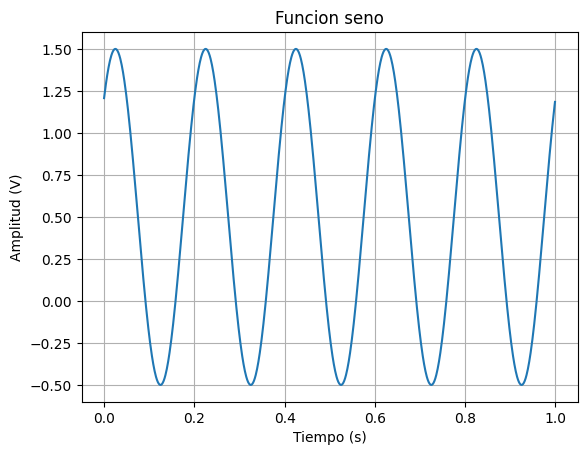

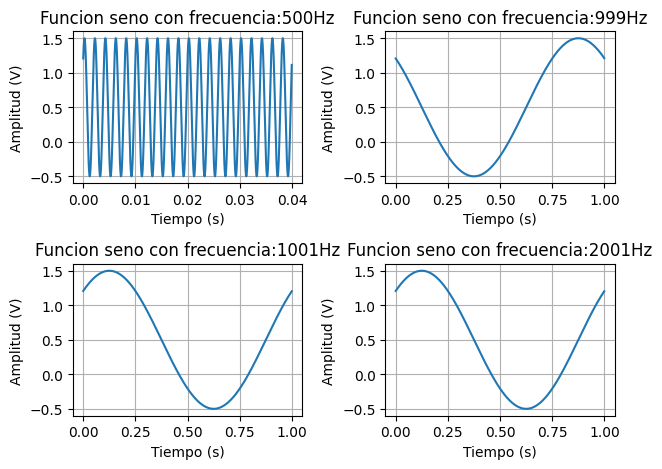

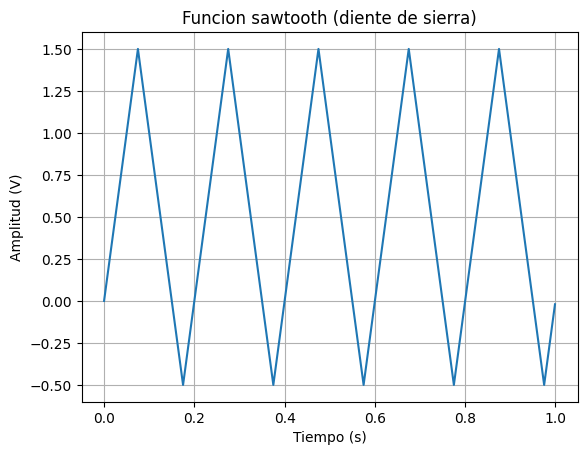

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 13 18:56:16 2025

@author: gueva
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# ===================================
#Ejecicio TP0
def funcion_seno(amp, desplazo, frec, fase, cant_muestras, frec_muestreo):
    # Crear el vector de tiempos
    tt = (np.arange(cant_muestras)/frec_muestreo).reshape(-1, 1)
    
    # Calcular la señal senoidal
    xx = (amp * np.sin(2 * np.pi * frec * tt + fase) + desplazo).reshape(-1, 1)
    return tt, xx
    
    # Generar señal
tt, xx = funcion_seno(amp=1, desplazo=0.5, frec=5, fase=np.pi/4, cant_muestras=1000, frec_muestreo=1000)
    
    # Graficar
plt.figure(1)
plt.plot(tt, xx)
plt.title('Funcion seno')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.grid(True)
plt.show()

# ==========================================
#Bonus: Experimento con frecuencias vistas en clase:
lista_frec_experimento = [500,999,1001,2001]
plt.figure(2)
for i in range(len(lista_frec_experimento)):
    frec = lista_frec_experimento[i]
    if (frec == 500):
        tt, xx = funcion_seno(amp=1, desplazo=0.5, frec=frec, fase=np.pi/4, cant_muestras=1000, frec_muestreo=25000)
        plt.subplot(2, 2, i+1)  
        plt.plot(tt, xx)
        plt.title(f'Funcion seno con frecuencia:{frec}Hz')
        plt.xlabel('Tiempo (s)')
        plt.ylabel('Amplitud (V)')
        plt.grid(True)
    else:
        tt, xx = funcion_seno(amp=1, desplazo=0.5, frec=frec, fase=np.pi/4, cant_muestras=1000, frec_muestreo=1000)
        plt.subplot(2, 2, i+1)  
        plt.plot(tt, xx)
        plt.title(f'Funcion seno con frecuencia:{frec}Hz')
        plt.xlabel('Tiempo (s)')
        plt.ylabel('Amplitud (V)')
        plt.grid(True)

plt.tight_layout()
plt.show()

# ==========================================
#Bonus: Experimentar con otra funcion:
def generar_sawtooth(amp, desplazo, frec, fase, cant_muestras, frec_muestreo, width):
    # Vector de tiempos con arange
    tt = (np.arange(cant_muestras)/frec_muestreo).reshape(-1, 1)
    
    # Generar señal sawtooth
    xx = (amp * signal.sawtooth(2 * np.pi * frec * tt + fase, width=width) + desplazo).reshape(-1, 1)
    return tt, xx

    # Generar señal
tt, xx = generar_sawtooth(amp=1, desplazo=0.5, frec=5, fase=np.pi/4, cant_muestras=1000, frec_muestreo=1000, width=0.5)
     
    # Graficar
plt.figure(3)
plt.plot(tt, xx)
plt.title('Funcion sawtooth (diente de sierra)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.grid(True)
plt.show()

# Análisis gráficos
Una caracteristica interesante a remarcar es que en los subplots entre 999 y 1001 se invierte la fase. Según la explicación en clase, esto es la consecuencia de que al muestrear las frecuencias mayores a Nyquist se pliegan hacia atrás (se trasladan sus réplicas) y aparecen invertidas. La frecuencia de muestreo, $f_s$, es de 1000Hz en el codigo, por ende, tengo una frecuencia de nyquist de 500Hz, eso significa que todo lo que esté por encima de 500 Hz se pliega (aliasing). Cuando tomás una señal continua, en este caso el seno y se muestrea a una frecuencia de muestreo, $f_s$, en el espectro discreto aparecen réplicas cada múltiplo de $f_s$, siendo $f_{\text{aliasing}} = f - f_s$. Para 999Hz, $f_s - f = 1000 - 999 = 1 \ \text{Hz}$, en otras palabras, tu seno de 999 Hz se ve como uno de 1 Hz. Para 1000Hz, $f_s - f = 1000 - 1001 = -1 \ \text{Hz}$, lo mismo que el de 999Hz pero con inversión de fase (señal reflejada en el tiempo). Finalmente, al graficar la funcion seno con frecuencia 500Hz aparecia una mancha, no se identificaba tal onda. Por ende, tuve que realizar un for y aumentar la frecuencia de muestreo en ese caso tengo mas muestras por periodo. Esto aproxima el seno muchísimo mejor, porque la curva está definida con más puntos intermedios.
# Conclusión
Este trabajo practico permitió comprobar los conceptos teóricos estudiados en clase sobre el muestreo y el Teorema de Nyquist-Shannon, mediante el codigo y los gráficos. A través de la construcción de una función senoidal parametrizable y su aplicación en distintas frecuencias, se pudo observar cómo la elección de los parámetros de muestreo condiciona la representación de una señal digitalizada. El hecho de experimentar con frecuencias cercanas o superiores a la de Nyquist mostró el fenómeno de aliasing, y evidenció la importancia de utilizar el "sampling" adecuado para evitar errores, como la distorsion irreversible de la señal reconstruida.

La experiencia de ir ajustando los parametros facilitó el análisis, reforzando la idea de que tomar pocas muestras genera pérdidas de información irreversibles. Además, la comparación entre diferentes frecuencias y la incorporación de la función sawtooth enriquecieron el estudio, demostrando que, a pesar de las modificaciones, se comporta parecido a una onda senoidal.

# Biblografía
- Holton, T. (2021). Digital signal processing: Principles and applications. Cambridge University Press. https://doi.org/10.1017/9781108290050
- NumPy user guide — NumPy v2.3 Manual. (2025). Numpy.org. https://numpy.org/doc/stable/user/index.html
- Signal processing (scipy.signal) — SciPy v1.16.1 Manual. (2025). Scipy.org. https://docs.scipy.org/doc/scipy/reference/signal.html#waveforms
